In [1]:
# Import the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [6]:
# Import the dataset which contains all the molecules that constitute the first coformer of the extracted from CSD database and their dragon descriptors calculated after filtering with Pipeline Pilot

dataset1=pd.read_csv('../data/coformers1.csv') 
print(dataset1.shape)
dataset1.head()

(1722, 1859)


,Identifier,NAME,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,Cc1ccccc1C,106.18,5.899,10.634,17.418,11.807,20.076,0.591,0.968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PIWKEL,O=C1C=CC2=C(C=C1)C(=O)C1=C(C=CC(=O)C=C1)C2=O,264.24,9.437,20.966,28.844,20.864,30.498,0.749,1.030,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,OTIHIJ,CN(C)c1ccc(cc1)C(C(C1=CC=C2C=CC=CC=C12)C1=C2C=...,520.76,6.852,48.998,74.225,52.955,84.055,0.645,0.977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DABLOJ,CCOC(C)=O,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PIGJUK,CSC1=Cc2ccc3SC(=Cc4ccc(S1)c2c34)SC,332.56,10.393,23.909,31.607,27.159,34.171,0.747,0.988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Import the dataset which contains all the molecules that constitute the second coformer of the extracted from CSD database and their dragon descriptors calculated after filtering with Pipeline Pilot

dataset2=pd.read_csv('../data/coformers2.csv')
print(dataset2.shape)

(1722, 1859)


In [8]:
df1=dataset1.iloc[:,2:]
df1 = df1.fillna(df1.mean())
df2=dataset2.iloc[:,2:]
df2 = df2.fillna(df2.mean())
df1=df1.dropna(axis=1)
df2=df2[df1.columns.values]


In [9]:
pyrene_cocrystals1 = dataset1[dataset1.NAME == 'c1cc2ccc3cccc4ccc(c1)c2c34']
pyrene_cocrystals2 = dataset2[dataset2.NAME == 'c1cc2ccc3cccc4ccc(c1)c2c34']
pyrene_cocrystals = pd.concat([pyrene_cocrystals1, pyrene_cocrystals2]).Identifier.values

In [10]:
# Construct the labelled dataset by contatenating the feature set of each coformer in both orders
# We have a vector of 50 dimensions now
def concat_bidirectional(dataset_1, dataset_2):

  return pd.concat([pd.concat([dataset1['Identifier'], dataset_1, dataset_2], axis=1), pd.concat([dataset1['Identifier'],dataset_2, dataset_1], axis=1) ])


In [11]:
# Standarize the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()

df_concat = pd.concat([df1, df2])
df_concat = df_concat.drop_duplicates(keep='first')
numerical_cols = df_concat.columns[:]
df_scaled = pd.DataFrame(X_scaler.fit(df_concat), columns=numerical_cols, index=df_concat.index)

numerical_cols = df2.columns[:]
df1_scaled =  pd.DataFrame(X_scaler.transform(df1[numerical_cols]), columns=numerical_cols, index=df1.index)
df2_scaled = pd.DataFrame(X_scaler.transform(df2[numerical_cols]), columns=numerical_cols, index=df2.index)

# Final bidirectional concatenated dataset, after feature selection and scaling 
df=dfna = concat_bidirectional(df1_scaled,df2_scaled)
dfna

,Identifier,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,PIWKEL,0.070361,0.134320,0.061649,0.050028,0.053788,0.046290,0.460870,0.403030,0.236546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
2,OTIHIJ,0.164308,0.066597,0.183830,0.174745,0.182948,0.174511,0.280000,0.242424,0.176471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,PIGJUK,0.095382,0.159366,0.074476,0.057622,0.079124,0.055084,0.457391,0.275758,0.366708,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,AFOTIB,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1718,CIQNIC,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1719,DIVZUG,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1720,PIQTOB,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.064566,0.013067,0.042275,0.040738,0.075327,0.05073,0.111453,0.029208,0.193697,0.033051


In [12]:
# Set the columns values based on the conformers they describe '_1' for the first molecule and '_2' for the second 
df1=dataset1.iloc[:,2:]
labels1 = df1.rename(columns=lambda x: f"{x}_1")
labels2 = df1.rename(columns=lambda x: f"{x}_2")
dataset1_labels = labels1.columns.values
dataset2_labels = labels2.columns.values

cols = np.concatenate((dataset1_labels, dataset2_labels))

train1 = pd.DataFrame(df.iloc[:1722, 1:].values, columns=cols)
df = pd.concat([pd.DataFrame(df.iloc[:1722, 0].values, columns=['Identifier']),  pd.DataFrame(train1.values, columns=cols)], axis=1)
df

,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,...,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PIWKEL,0.070361,0.134320,0.061649,0.050028,0.053788,0.046290,0.460870,0.403030,0.236546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,OTIHIJ,0.164308,0.066597,0.183830,0.174745,0.182948,0.174511,0.280000,0.242424,0.176471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PIGJUK,0.095382,0.159366,0.074476,0.057622,0.079124,0.055084,0.457391,0.275758,0.366708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,AFOTIB,0.448668,0.128111,0.396388,0.356635,0.391326,0.343307,0.363478,0.300000,0.234043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1718,CIQNIC,0.392224,0.053445,0.444098,0.437131,0.537596,0.451291,0.208696,0.139394,0.285357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1719,DIVZUG,0.469412,0.098218,0.456237,0.432497,0.447307,0.420081,0.313043,0.312121,0.187735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1720,PIQTOB,0.088929,0.078963,0.195722,0.084664,0.093191,0.087279,0.364753,0.203030,0.196496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Generate the unknown dataset (unlabelled)

# Import the unlabeled data

# Read the Zinc dataset of purcasable molecules with their dragon descriptors
unlabeled = pd.read_csv('../data/unlabelled_dragon.csv')

val = unlabeled['NAME'].values
length = len(val)
unlabeled=unlabeled.loc[:, (unlabeled != 0).any(axis=0)]


pairs = [[val[i],val[j]] for i in range(length) for j in range(length) if i!=j ]

# Remove the duplicate structures
no_dups = []
for pair in pairs:
  if not any(all(i in p for i in pair) for p in no_dups):
    no_dups.append(pair)

pairs = pd.DataFrame(no_dups)
keys = unlabeled['NAME'].values
values = unlabeled.iloc[:, 1:].values

d = {key:value for key, value in zip(keys, values)}


In [14]:
mol1_data= list()

for mol1 in pairs[0]:       
    mol1_data.append(d[mol1])
    
mol1_data = pd.DataFrame(mol1_data, columns = unlabeled.iloc[:, 1:].columns.values)   

mol2_data= list()

for mol2 in pairs[1]:   
    mol2_data.append(d[mol2])
mol2_data = pd.DataFrame(mol2_data, columns= unlabeled.iloc[:, 1:].columns.values) 

In [15]:
final_1 = pd.concat([pairs[0],mol1_data],axis=1)
final_1 = final_1.fillna(df1.mean())
final_2 = pd.concat([pairs[1],mol2_data],axis=1)
final_2 = final_2.fillna(df1.mean())

unlab=pd.concat([pairs[0], pairs[1]], axis=1)
final_1 = final_1.replace({'#NUM!': 0})
final_2 = final_2.replace({'#NUM!': 0})

final_11=final_1[df1.iloc[:,:].columns.values]
final_22=final_2[df1.iloc[:,:].columns.values]

In [16]:
# Standarize the unlabeled data based on the labelled
final_1_scaled = pd.DataFrame(X_scaler.transform(final_11))
final_2_scaled = pd.DataFrame(X_scaler.transform(final_22))
uf=pd.concat([final_1_scaled, final_2_scaled], axis =1)

In [17]:
# Define a dictionary where the comb identifier will be combined to the feature vector
comb=[]
for i in range(1,final_11.shape[0]+1):
  comb.append('comb%s' % i)

uf_tot=pd.concat([pd.DataFrame(comb, columns=['comb']),final_11, final_22 ], axis=1)

keys1 = uf_tot['comb'].values
values1 =  uf_tot.iloc[:, 1:].values

dii={key:value for key, value in zip(keys1, values1)}

In [18]:
# Print the first lines of whole unlabelled dataset
df_tota= pd.concat([pd.DataFrame(df['Identifier'].values, columns=['comb']), pd.DataFrame(df.iloc[:, 1:].values) ],axis=1)
uf_tota=pd.concat([pd.DataFrame(comb, columns=['comb']), pd.DataFrame(uf.values)],axis=1) 
uf_final= pd.DataFrame(uf_tota.values, columns=df.columns.values)
uf_final.head()

,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,...,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,comb1,0.0586417,0.12109,0.0554202,0.0427319,0.0501292,0.040501,0.464348,0.333333,0.26408,...,1,0,0,0,1,0,1,0,1,0
1,comb2,0.0586417,0.12109,0.0554202,0.0427319,0.0501292,0.040501,0.464348,0.333333,0.26408,...,0,0,1,0,0,0,0,0,1,0
2,comb3,0.0586417,0.12109,0.0554202,0.0427319,0.0501292,0.040501,0.464348,0.333333,0.26408,...,0,0,0,0,0,0,0,0,0,0
3,comb4,0.0586417,0.12109,0.0554202,0.0427319,0.0501292,0.040501,0.464348,0.333333,0.26408,...,0,0,0,0,0,0,0,0,0,0
4,comb5,0.0586417,0.12109,0.0554202,0.0427319,0.0501292,0.040501,0.464348,0.333333,0.26408,...,0,0,0,0,0,0,0,0,1,0


In [19]:
exper = ['comb1817', 'comb1799']

experiments = uf_final[uf_final.Identifier.isin(exper)]
experiments = pd.DataFrame(experiments.values, columns=df.columns.values)

In [20]:
df_new = pd.concat([df, experiments])
df_new.iloc[-2:, :]

,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,...,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,comb1799,0.0476619,0.0908829,0.0514843,0.0406131,0.0495335,0.0404915,0.405217,0.245455,0.257822,...,0,0,0,0,0,1,1,0,1,0
1,comb1817,0.0476619,0.0908829,0.0514843,0.0406131,0.0495335,0.0404915,0.405217,0.245455,0.257822,...,1,0,0,0,0,1,1,0,1,1


In [21]:
df_all = df_new
df_all


,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,...,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,WOVMEB,0.012474,0.0416296,0.0166152,0.0186274,0.0173349,0.0213386,0.186087,0.215152,0.125156,...,0,0,0,0,0,0,0,0,0,0
1,PIWKEL,0.0703613,0.13432,0.0616487,0.0500284,0.0537878,0.04629,0.46087,0.40303,0.236546,...,0,0,0,0,0,0,0,0,1,0
2,OTIHIJ,0.164308,0.0665968,0.18383,0.174745,0.182948,0.174511,0.28,0.242424,0.176471,...,0,0,0,0,0,0,0,0,0,0
3,DABLOJ,0.00585978,0.051978,0.00311643,0.0097534,0.0018313,0.0117718,0.093913,0.354545,0.0150188,...,0,0,0,0,0,0,0,0,0,0
4,PIGJUK,0.0953825,0.159366,0.0744762,0.0576218,0.079124,0.0550835,0.457391,0.275758,0.366708,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,DIVZUG,0.469412,0.0982185,0.456237,0.432497,0.447307,0.420081,0.313043,0.312121,0.187735,...,0,0,0,0,0,0,0,0,0,0
1720,PIQTOB,0.0889294,0.0789625,0.195722,0.0846642,0.0931908,0.0872794,0.364753,0.20303,0.196496,...,0,0,0,0,0,0,0,0,0,0
1721,RAWXEU,0.191153,0.257637,0.111682,0.0896906,0.106682,0.0837361,0.502609,0.40303,0.317897,...,0,0,0,0,0,0,0,0,0,0
0,comb1799,0.0476619,0.0908829,0.0514843,0.0406131,0.0495335,0.0404915,0.405217,0.245455,0.257822,...,0,0,0,0,0,1,1,0,1,0


In [22]:
def feature_first(a, b, w_a, w_b):
    f, s = (a, b) if w_a < w_b else (b,a)
    return np.concatenate((f,s))

def feature_apply(X):
    return feature_first(X[:1857], X[1857:], X['nHet_1'], X['nHet_2'])

df_mw = df_all.iloc[:, 1:] 
mod_df = df_mw.apply(feature_apply, axis=1, result_type='expand')
mod_df

,0,1,2,3,4,5,6,7,8,9,...,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713
0,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,0.408922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.048438,0.269557,0.021706,0.009435,0.026620,0.008013,0.624348,0.327273,0.565707,0.115242,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000
2,0.002197,0.057637,0.003304,0.002778,0.003155,0.004987,0.257391,0.224242,0.167710,0.368030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,0.535316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.066706,0.143280,0.060106,0.043012,0.053466,0.041286,0.537391,0.345455,0.304130,0.327138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,0.394052,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1720,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,0.394052,...,0.064566,0.013067,0.042275,0.040738,0.075327,0.05073,0.111453,0.029208,0.193697,0.033051
1721,0.002560,0.075504,0.001103,0.000629,0.000117,0.002792,0.276522,0.275758,0.160200,0.431227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
0,0.047662,0.090883,0.051484,0.040613,0.049534,0.040491,0.405217,0.245455,0.257822,0.278810,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000


In [23]:
df_mod = pd.concat([pd.DataFrame(df_all.iloc[:, 0].values, columns=['Identifier']), pd.DataFrame(mod_df.values, columns=dfna.columns.values[1:]) ], axis=1)
pyrene_df = df_mod[df_mod.Identifier.isin(pyrene_cocrystals)]#
print(len(pyrene_df))
df_all = df_mod
df_mod

52


,Identifier,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,PIWKEL,0.048438,0.269557,0.021706,0.009435,0.026620,0.008013,0.624348,0.327273,0.565707,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000
2,OTIHIJ,0.002197,0.057637,0.003304,0.002778,0.003155,0.004987,0.257391,0.224242,0.167710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,PIGJUK,0.066706,0.143280,0.060106,0.043012,0.053466,0.041286,0.537391,0.345455,0.304130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,DIVZUG,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1720,PIQTOB,0.007336,0.048022,0.009960,0.010702,0.010247,0.013163,0.213913,0.218182,0.142678,...,0.064566,0.013067,0.042275,0.040738,0.075327,0.05073,0.111453,0.029208,0.193697,0.033051
1721,RAWXEU,0.002560,0.075504,0.001103,0.000629,0.000117,0.002792,0.276522,0.275758,0.160200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1722,comb1799,0.047662,0.090883,0.051484,0.040613,0.049534,0.040491,0.405217,0.245455,0.257822,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000


In [24]:
from scipy.spatial.distance import pdist, squareform
dist_mat = squareform(pdist(df_all.iloc[:, 1:])) # df_mw.iloc[:, 1:]))   #df_all.iloc[:, 1:]))
len(dist_mat[-2])


1724

# Barcharts

In [25]:
compound2 = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(dist_mat[-1], columns=['dist']) ], axis=1)
#.shape#[compound2.dist < 5.5]
compound2 = compound2.sort_values(by='dist', ascending=True)
compound2 = compound2.drop_duplicates(subset='Identifier', keep="first")
compound2[:15]#[compound2.dist > 10][:10]

,Identifier,dist
1723,comb1817,0.000000
1722,comb1799,4.830226
171,PYRTCQ03,4.878848
166,PYRCBZ02,5.175473
200,UZEGOX,5.219452
1230,MIDDIP,5.293238
98,CHRTCQ01,5.314611
131,HIGPUJ07,5.332273
189,TCQANT01,5.349871
1127,AGOREW,5.462192


In [27]:
compound1 = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(dist_mat[-2], columns=['dist']) ], axis=1)
compound1 =compound1.sort_values(by='dist', ascending=True)
compound1 = compound1.drop_duplicates(subset='Identifier', keep="first")
compound1[:10]#.iloc[1:10,:]#[compound1.dist >10]  #.iloc[1:10, :]#[compound1.Identifier != 'comb1817']

,Identifier,dist
1722,comb1799,0.000000
170,PYRPMA11,4.424954
94,CEKBUP,4.548945
1140,VIPYUR,4.680025
1208,VIPYOL,4.727222
206,WABWEB,4.751429
1723,comb1817,4.830226
120,FILHIR,4.901239
158,PENPYM,4.906714
121,FILHOX,4.920385


In [28]:
compound1_bar= pd.concat([compound1.iloc[1:10, :][compound1.Identifier != 'comb1817'] ,compound1[compound1.Identifier == 'YIBHIC']])

In [29]:
compound2_bar= pd.concat([compound2.iloc[2:10, :] ,compound2[compound2.Identifier == 'MBZTCE01']])

compound2_bar

,Identifier,dist
171,PYRTCQ03,4.878848
166,PYRCBZ02,5.175473
200,UZEGOX,5.219452
1230,MIDDIP,5.293238
98,CHRTCQ01,5.314611
131,HIGPUJ07,5.332273
189,TCQANT01,5.349871
1127,AGOREW,5.462192
1114,MBZTCE01,10.115543


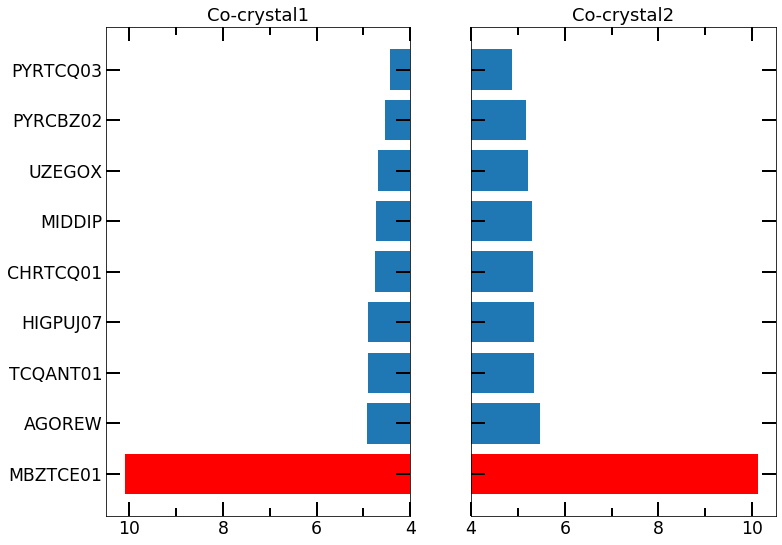

In [37]:
import matplotlib.font_manager
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 9))

pos1 = np.arange(len(compound1_bar.Identifier.values))

ax1.barh(pos1[:-1],compound1_bar.dist.values[:-1],
                     align='center',
                     height=0.8) 
ax1.barh(pos1[-1],compound1_bar.dist.values[-1], color='r',
                    align='center',
                     height=0.8)
idx = np.asarray([i for i in range(len(compound1_bar.Identifier.values))])                 
#ax1.set_yticks(idx)
#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax1.set_yticklabels(compound1_bar.Identifier.values)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.set_facecolor('xkcd:white')
ax1.set_xlim(4, 10.1)
ax1.set_title('Co-crystal1', fontsize=18)
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(4, 10.1, 2)
minor_ticks_x = np.arange(4, 10.1, 1)
ax1.set_xticks(major_ticks_x)
ax1.set_xticks(minor_ticks_x, minor=True)
ax1.set_xlim([4, 10.5])
ax1.xaxis.grid(False)
ax1.invert_xaxis()


# ax2
pos2 = np.arange(len(compound2_bar.Identifier.values))
rects2 = ax2.barh(pos2[:-1],compound2_bar.dist.values[:-1],
                     align='center',
                     height=0.8, tick_label=compound2_bar.Identifier.values[:-1]) 

ax2.barh(pos2[-1],compound2_bar.dist.values[-1], color='r',
                    align='center',
                     height=0.8)
idx = np.asarray([i for i in range(len(compound2_bar.Identifier.values))])                 
ax2.set_yticks(idx)
ax2.set_yticklabels(compound2_bar.Identifier.values)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.set_xlim(4, 10.1)
ax2.set_title('Co-crystal2',fontsize=18)
#ax1.set_ylim(100, 10.1)
ax2.tick_params(axis = 'both', which='both', width=2)
ax2.tick_params(axis = 'both', which='major', length=14)
ax2.tick_params(axis = 'both', which='minor', length=8, color='black')
ax2.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(4, 10.1, 2)
minor_ticks_x = np.arange(4, 10.1, 1)
ax2.set_xticks(major_ticks_x)
ax2.set_xticks(minor_ticks_x, minor=True)
ax2.set_xlim([4, 10.5])
ax2.xaxis.grid(False)

plt.gca().invert_yaxis()

2D mapping with UMAP

In [48]:
pyr_pack=pd.read_csv('./data/pyrene_pack.csv') 
pyr_pack.head()


,Identifier,packing
0,CUSZUM,4
1,BITBUD,3
2,ELUGOJ,1
3,GUQQEQ,1
4,XETTEW,4


In [49]:
# Dictionary where each smiles is associated with its ZINC Identifier
k1=pyr_pack.Identifier.values
v1=pyr_pack.packing.values
pack_dict= {key:value for key, value in zip(k1, v1)}
y=[]
for i in pyrene_df.Identifier[:]:
  y.append(pack_dict[i])
#len(y)
#y = list(y)
#y.append(3)
len(y)

52

In [50]:
pack = pd.concat([pd.DataFrame(pyrene_df.Identifier.values),pd.DataFrame(y)],axis=1)

In [ ]:
# Visualization with UMAP
import umap
reducer = umap.UMAP(random_state=1, n_neighbors= 80)
embedding = reducer.fit_transform(df_all.iloc[:,1:]) 

In [ ]:
# Visualization with UMAP
import umap
reducer = umap.UMAP(random_state=1, n_neighbors= 80)
embedding = reducer.fit_transform(df_all.iloc[:,1:]) 

In [ ]:
# Check how much of the distance is preserved on the data
from scipy.spatial.distance import squareform, pdist
dist_mat_umap = squareform(pdist(embedding))
pearso
n = np.corrcoef(dist_mat.flatten() ,dist_mat_umap.flatten())
print(pearson[1,0])

0.7468902862947864


In [83]:
#pyrene = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']), pd.DataFrame(embedding[:, 1],columns=['emb3']) ], axis=1)
embedded = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']) ], axis=1)
pyr = embedded[embedded.Identifier.isin(pyrene_cocrystals)] #packing.Identifier.values)]
pyr = pd.concat([pd.DataFrame(pyr.values, columns=pyr.columns.values), pd.DataFrame(y, columns=['pack'])], axis=1)


In [84]:
eucli_neighbours_1 = ['PYRPMA11', 'CEKBUP', 'VIPYUR', 'VIPYOL', 'WABWEB' , 'FILHIR' , 'PENPYM' , 'FILHOX']
eucli_neighbours_2 = ['PYRTCQ03', 'PYRCBZ02', 'UZEGOX' , 'MIDDIP', 'CHRTCQ01', 'HIGPUJ07', 'TCQANT01', 'AGOREW']
embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1
embedded[embedded.Identifier.isin(eucli_neighbours_2)]

,Identifier,emb1,emb2
98,CHRTCQ01,-1.234573,3.250177
131,HIGPUJ07,-1.198147,3.294332
166,PYRCBZ02,-1.333178,3.778983
171,PYRTCQ03,-1.165959,3.343748
189,TCQANT01,-1.192773,3.517171
200,UZEGOX,-0.902048,3.190525
1127,AGOREW,-0.553022,3.527663
1230,MIDDIP,-1.205492,3.276756


In [85]:
def descr_diff(descriptor):
  des_color = (df_all[descriptor].iloc[:, 0] - df_all[descriptor].iloc[:, 1]).abs()
  return des_color

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


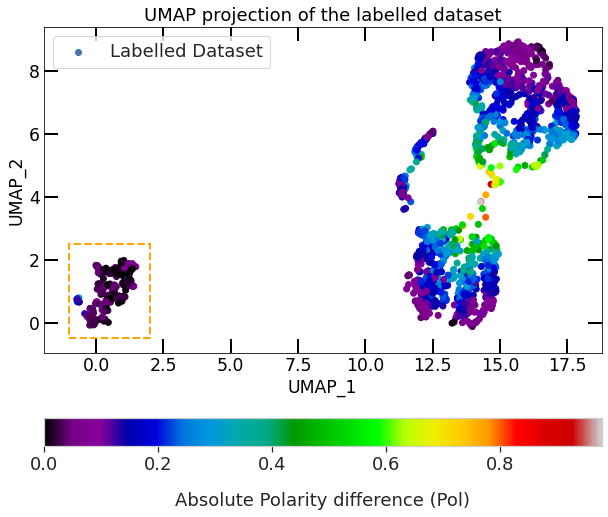

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
# Create a Rectangle patch
rect = Rectangle((-1,-0.5),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')
ax.add_patch(rect)

s = ax.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c=  descr_diff('Si') , cmap=  'nipy_spectral' )  #newcmp)  'viridis_r') #'nipy_spectral'   descr_diff('Si')
##ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')

##ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
##ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)

#s1=ax.scatter(embedding1[:, 0], embedding1[:, 1],   label= 'Unlabelled', c= uf_color , cmap='viridis' , alpha=1 )

cbar = plt.colorbar(s, ax=ax, orientation='horizontal', fraction=.1)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_xlabel('Absolute Polarity difference (Pol)', fontsize=18, )
cbar.ax.tick_params(labelsize=18)
#cbar = plt.colorbar(s1, ax=ax, orientation='vertical', fraction=.1)

#ax.set_xlim(-1, 2)
#ax.set_ylim(-1, 2.5)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

plt.title('UMAP projection of the labelled dataset', fontsize=18);
plt.xlabel('UMAP_1')

ax.set_ylabel('UMAP_2')
plt.legend(prop={'size': 18})#, loc=(0.3, -0.47))
#plt.savefig('umap_.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

In [51]:
pyr1 = [x for x in pyrene_cocrystals if x in eucli_neighbours_1]
pyr2 = [x for x in pyrene_cocrystals if x in eucli_neighbours_2]

pyr_cocry = [x for x in pyrene_cocrystals if x not in pyr1 if x not in pyr2]
out = eucli_neighbours_1 + eucli_neighbours_2 + list(pyrene_cocrystals)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


Text(0, 0.5, 'UMAP2')

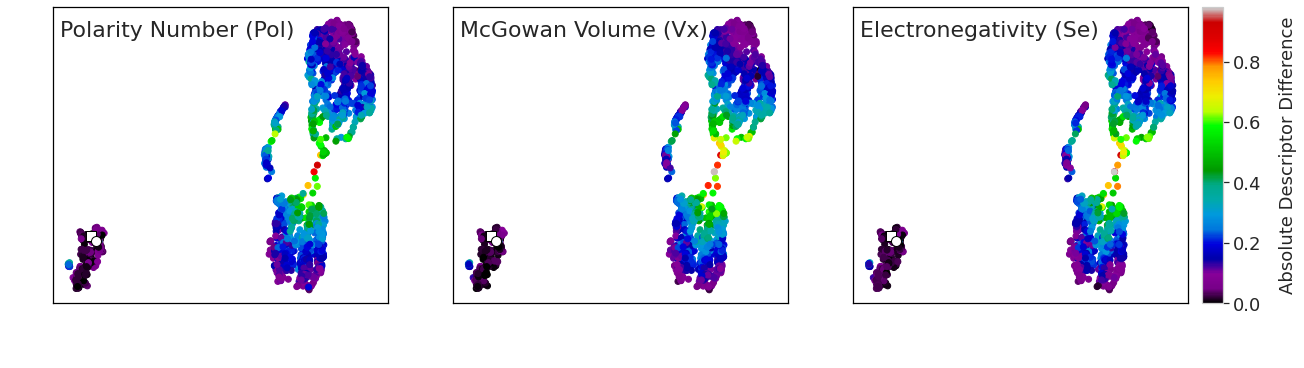

In [230]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"


with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, axes = plt.subplots(figsize=(18,5),nrows=1, ncols=3,constrained_layout=True)#, gridspec_kw = {'wspace':0.25, 'hspace':0.3})
    ax0, ax1, ax2= axes.flatten()


# Polarity
ax0.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Pol') , cmap=  'nipy_spectral' ) 
ax0.text(0.02, 0.9, 'Polarity Number (Pol)', transform=ax0.transAxes, ha="left" ,fontsize=22)
ax0.axis(aspect='equal')
ax0.set(adjustable='box')#, aspect='equal')
ax0.grid(False)
ax0.set_facecolor('xkcd:white')
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax0.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black') 
ax0.tick_params(axis = 'both', which='both', width=2, color='white')
ax0.set_xlabel("UMAP1",fontsize=20, color='white')
ax0.set_ylabel("UMAP2",fontsize=20, color='white')


#Volume
ax1.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Vx') , cmap=  'nipy_spectral' ) 
ax1.text(0.02, 0.9, 'McGowan Volume (Vx)', 
        transform=ax1.transAxes, ha="left" ,fontsize=22)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax1.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black') 
ax1.tick_params(axis = 'both', which='both', width=2, color='white')
ax1.set_xlabel("UMAP1",fontsize=25, color='white')
ax1.set_ylabel("UMAP2",fontsize=25, color='white')

#Electronic
s=ax2.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.text(0.02, 0.9, 'Electronegativity (Se)', transform=ax2.transAxes, ha="left" ,fontsize=22)

ax2.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax2.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black')  
cbar = plt.colorbar(s, ax=ax2, orientation='vertical', fraction=.1, aspect=50)
#cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
ax2.tick_params(axis = 'both', which='both', width=2, color='white')
ax2.set_xlabel("UMAP1",fontsize=25, color='white')
ax2.set_ylabel("UMAP2",fontsize=25, color='white')



#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20 )
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)
#plt.legend( bbox_to_anchor= (0.73, 0.75), ncol=1, fontsize=20, facecolor='white', framealpha=1, edgecolor='black')
#plt.savefig('figure9_unlab.png',rasterized=True,  bbox_inches="tight", dpi=600)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


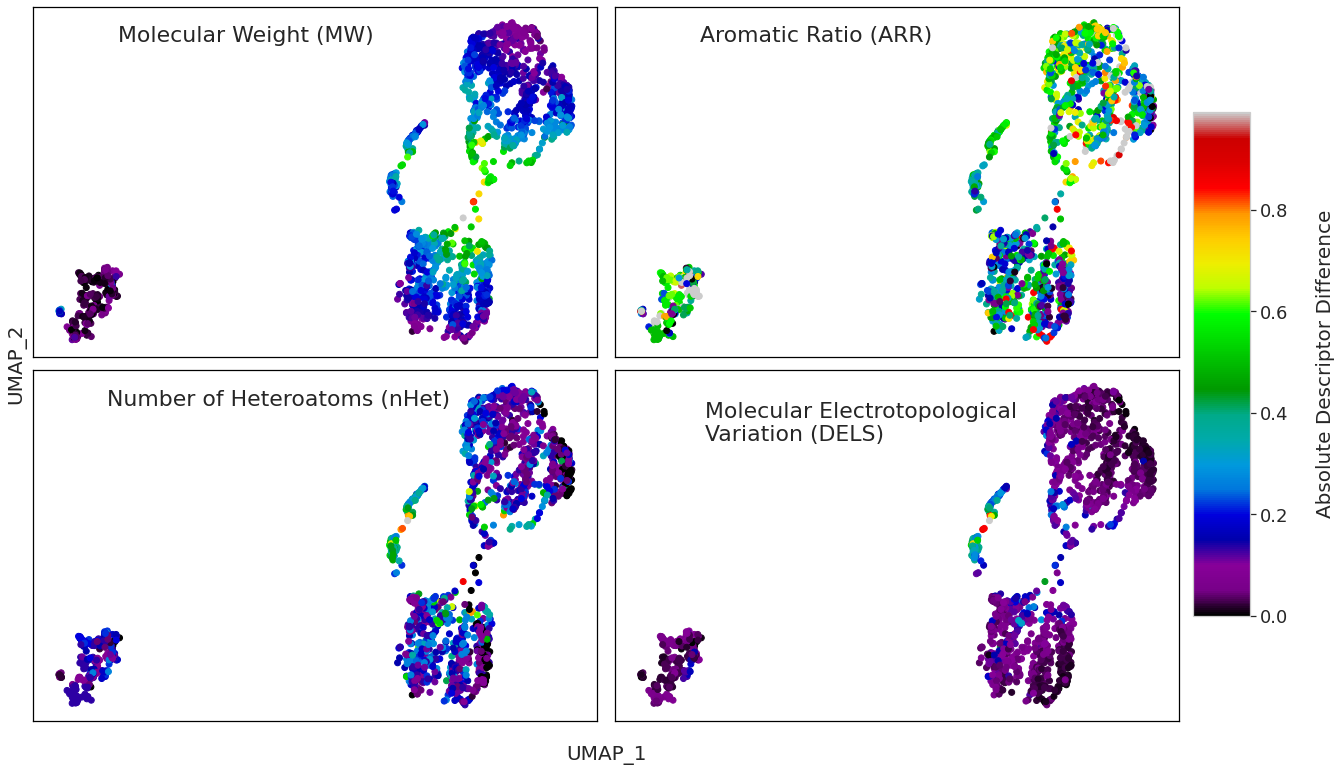

In [264]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
fig, axes = plt.subplots(figsize=(16,10),nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})
ax0, ax1, ax2, ax3= axes.flatten()



# Molecular Weight
im=ax0.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('MW') , cmap=  'nipy_spectral' ) 
ax0.text(0.15, 0.9, 'Molecular Weight (MW)', transform=ax0.transAxes, ha="left" ,fontsize=22)
ax0.axis(aspect='equal')
ax0.set(adjustable='box')#, aspect='equal')
ax0.grid(False)
ax0.set_facecolor('xkcd:white')
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
#ax0.add_patch(rect)

# Aromaticity
s=ax1.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('ARR') , cmap=  'nipy_spectral' ) 
ax1.text(0.15, 0.9, 'Aromatic Ratio (ARR)', 
        transform=ax1.transAxes, ha="left" ,fontsize=22)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

cbar_ax = fig.add_axes([1.009, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
#cbar = plt.colorbar(s, ax=ax1, orientation='vertical', fraction=.1, aspect=50)
#cbar.ax.get_yaxis().set_ticks([])
cbar_ax.get_yaxis().labelpad = 28
cbar_ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=20)
cbar_ax.tick_params(labelsize=18)


#Electronic
ax2.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('nHet') , cmap=  'nipy_spectral' ) 
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.text(0.13, 0.9, 'Number of Heteroatoms (nHet)', transform=ax2.transAxes, ha="left" ,fontsize=22)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
#ax2.add_patch(rect)

ax3.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('DELS') , cmap=  'nipy_spectral' ) 
ax3.axis(aspect='equal')
ax3.set(adjustable='box')#, aspect='equal')
ax3.grid(False)
ax3.set_facecolor('xkcd:white')
ax3.spines['bottom'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.axis('on')
ax3.text(0.16, 0.8, 'Molecular Electrotopological\nVariation (DELS)', transform=ax3.transAxes, ha="left" ,fontsize=22)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

#ax3.text(0.1, 0.9, 'Area with lowest absolute difference', transform=ax3.transAxes, ha="left" ,fontsize=22)
#ax3.legend( bbox_to_anchor= (0.63, 0.48), ncol=1, fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20 )
fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

plt.savefig('/content/drive/My Drive/cocrystal_design/figures/umap_SI.png', rasterized=True,  bbox_inches="tight", dpi=600)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


Text(-0.02, 0.5, 'UMAP_2')

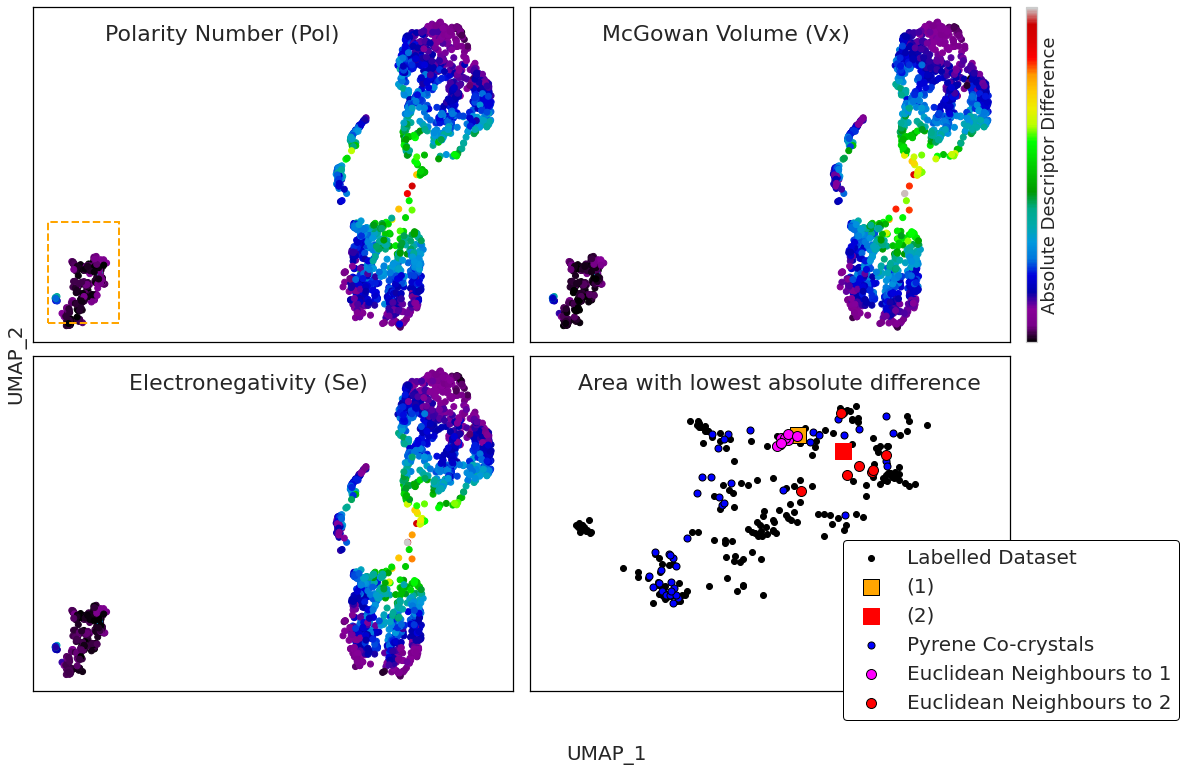

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
fig, axes = plt.subplots(figsize=(16,10),nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})
ax0, ax1, ax2, ax3= axes.flatten()

rect = Rectangle((-1,0),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

# Polarity
ax0.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Pol') , cmap=  'nipy_spectral' ) 
ax0.text(0.15, 0.9, 'Polarity Number (Pol)', transform=ax0.transAxes, ha="left" ,fontsize=22)
ax0.axis(aspect='equal')
ax0.set(adjustable='box')#, aspect='equal')
ax0.grid(False)
ax0.set_facecolor('xkcd:white')
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.add_patch(rect)

#Volume
s=ax1.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Vx') , cmap=  'nipy_spectral' ) 
ax1.text(0.15, 0.9, 'McGowan Volume (Vx)', 
        transform=ax1.transAxes, ha="left" ,fontsize=22)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
cbar = plt.colorbar(s, ax=ax1, orientation='vertical', fraction=.1, aspect=50)
cbar.ax.get_yaxis().set_ticks([])
#cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
#ax1.add_patch(rect)

#Electronic
ax2.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.text(0.2, 0.9, 'Electronegativity (Se)', transform=ax2.transAxes, ha="left" ,fontsize=22)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
#ax2.add_patch(rect)

#cbar = plt.colorbar(s, ax=ax2, orientation='vertical', fraction=.1, aspect=50)
#cbar.ax.get_yaxis().set_ticks([])
#cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
#cbar.ax.tick_params(labelsize=18)
ax3.set_xlim(-1, 2)
ax3.set_ylim(-1, 2.5)
ax3.axis(aspect='equal')
ax3.set(adjustable='box')#, aspect='equal')
ax3.grid(False)
ax3.set_facecolor('xkcd:white')
ax3.spines['bottom'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.axis('on')
ax3.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c='black') 
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='orange', label='(1)', s=250, marker='s', edgecolor='black')
ax3.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=250, marker='s')
ax3.scatter(embedded[embedded.Identifier.isin(pyrene_cocrystals)].emb1 , embedded[embedded.Identifier.isin(pyrene_cocrystals)].emb2, color='blue', label='Pyrene Co-crystals',edgecolor='black',  s=50)
ax3.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='magenta', label='Euclidean Neighbours to 1',edgecolor='black', s=100)
ax3.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb2, color='red', label='Euclidean Neighbours to 2',edgecolor='black',  s=100)

ax3.text(0.1, 0.9, 'Area with lowest absolute difference', transform=ax3.transAxes, ha="left" ,fontsize=22)
ax3.legend( bbox_to_anchor= (0.63, 0.48), ncol=1, fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20 )
fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

#plt.savefig('figure9_unlab.png', dpi=600)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


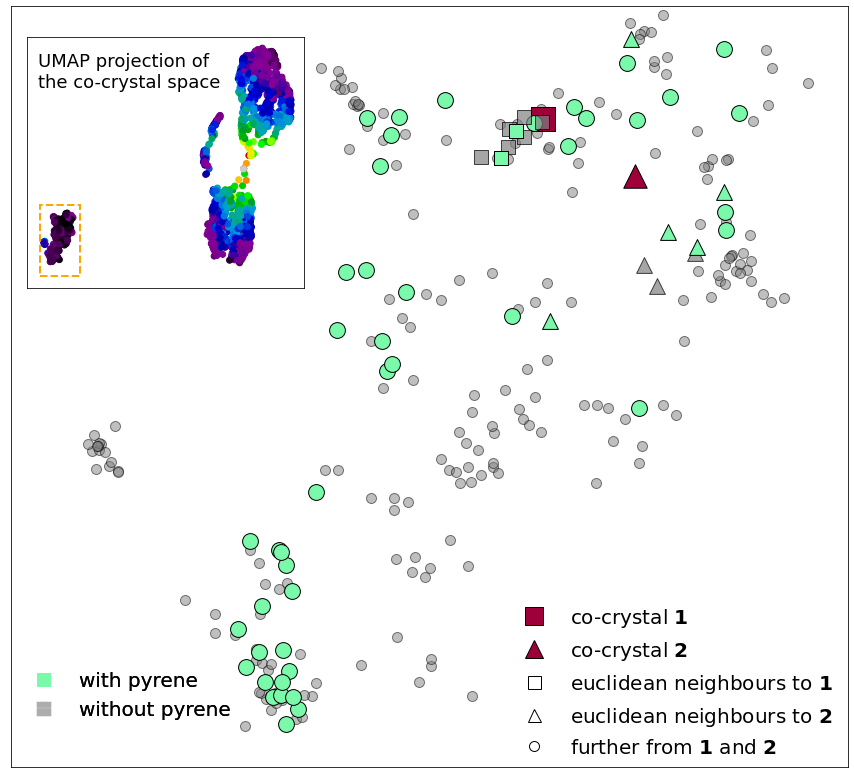

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, ax = plt.subplots(figsize=(15,14))#,nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})

rect = Rectangle((-1,-0.7),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

ax.set_xlim(-0.95, 1.6)
ax.set_ylim(-0.2, 2)
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.axis('on')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.scatter(embedded[~embedded.Identifier.isin(out)].emb1, embedded[~embedded.Identifier.isin(out)].emb2,   c='grey', s=100, alpha=0.5, edgecolor='black') 
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(1) + "}$", s=550, marker='s', edgecolor='black')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(2) + "}$", s=550, marker='^',edgecolor='black')


ax.scatter(embedded[embedded.Identifier.isin(pyr_cocry)].emb1 , embedded[embedded.Identifier.isin(pyr_cocry)].emb2, color='#7af9ab',edgecolor='black',  s=250)  
#ax.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='grey' , edgecolor='black', marker = 's', s=150, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb2, color='grey' ,edgecolor='black', marker = 's',  s=200, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr1)].emb1 , embedded[embedded.Identifier.isin(pyr1)].emb2, color='#7af9ab' , edgecolor='black', marker = 's', s=200, alpha=1)

ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb2, color='grey' ,edgecolor='black', marker = '^',  s=250, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr2)].emb1 , embedded[embedded.Identifier.isin(pyr2)].emb2, color='#7af9ab' ,edgecolor='black', marker = '^',  s=250, alpha=1)



sub_axes = ax.inset_axes([0.0, 0.67, .33, .33])
sub_axes.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  color='grey' ) 
sub_axes.scatter(embedded[embedded.Identifier.isin(pyr_cocry)].emb1 , embedded[embedded.Identifier.isin(pyr_cocry)].emb2, color='#7af9ab',edgecolor='black',  s=50)  
sub_axes.text(0.039, 0.8, 'UMAP projection of\nthe co-crystal space', transform=sub_axes.transAxes, ha="left" ,fontsize=18)
sub_axes.get_xaxis().set_visible(False)
sub_axes.get_yaxis().set_visible(False)
sub_axes.add_patch(rect)
sub_axes.spines['bottom'].set_color('black')
sub_axes.spines['top'].set_color('black')
sub_axes.spines['right'].set_color('black')
sub_axes.spines['left'].set_color('black')

from matplotlib.lines import Line2D
red_circle = Line2D([0], [0], marker='s', color='w', label='with pyrene', markeredgecolor = 'white',
                        markerfacecolor='#7af9ab', markersize=15)

grey_circle = Line2D([0], [0], marker='s', color='w', label='without pyrene', markeredgecolor = 'white',
                        markerfacecolor='grey', markersize=15, alpha=0.4)

k1= Line2D([0], [0], marker='o', color='w', label='further from ' + r"$\bf{" + str(1) + "}$ " + 'and ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=10 , alpha=1)   

k2=  Line2D([0], [0], marker='s', color='w',  label= "co-crystal " + r"$\bf{" + str(1) + "}$", markerfacecolor='#9e003a', markersize=18 ,markeredgecolor = 'black', alpha=1)   

k3=  Line2D([0], [0], marker='^', color='w', label= "co-crystal " + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='#9e003a', markersize=18 , alpha=1)  

k4=  Line2D([0], [0], marker='s', color='w',  label='euclidean neighbours to ' + r"$\bf{" + str(1) + "}$", markerfacecolor='white', markersize=13 ,markeredgecolor = 'black', alpha=1)   

k5=  Line2D([0], [0], marker='^', color='w', label='euclidean neighbours to ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=13 , alpha=1)  


legend1 =ax.legend(handles=[k2, k3, k4, k5, k1],  bbox_to_anchor= (0.58, 0.235) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

legend2 = ax.legend(handles=[red_circle,grey_circle],  bbox_to_anchor= (0.285, 0.15) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

#legend1  = ax.legend(bbox_to_anchor= (0.605, 0.315), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

ax.add_artist(legend1)
ax.add_artist(legend2)

#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20)
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

#plt.savefig('test8.png', rasterized=True,  bbox_inches="tight", dpi=600)